In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os
os.chdir('/Users/wyattscott/Documents/DS6050/Project')

In [2]:
df = pd.read_csv('Speeches_War_Clean.csv')

In [3]:
df.head()

,Date,President,Party,Transcript,War,Text Length
0,1798-03-23,John Adams,Federalist,as the safety and prosperity of nations ultima...,0,3972
1,1798-12-08,John Adams,Federalist,gentlemen of the senate and gentlemen of the h...,0,13335
2,1799-12-03,John Adams,Federalist,it is with peculiar satisfaction that i meet t...,0,9126
3,1799-12-19,John Adams,Federalist,gentlemen of the senate and gentlemen of the h...,0,7424
4,1800-05-21,John Adams,Federalist,whereas the late wicked and treasonable insurr...,1,1782


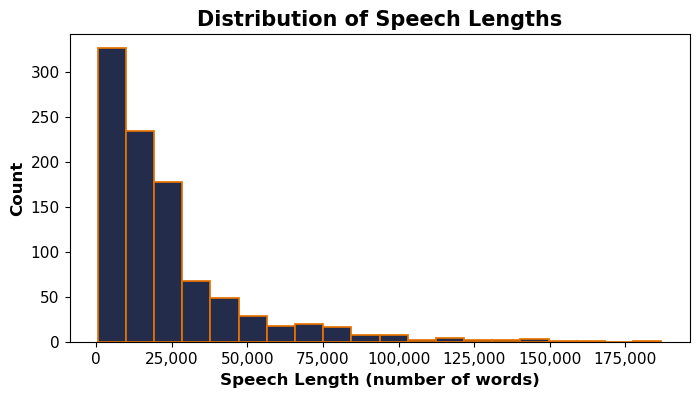

In [4]:
plt.figure(figsize=(8,4))

# Plot histogram
plt.hist(df['Text Length'].dropna(), bins=20, color='#232D4B', edgecolor='#E57200', linewidth=1.25)
plt.xlabel('Speech Length (number of words)', weight='bold', size=12)
plt.ylabel('Count', weight='bold', size=12)
plt.title('Distribution of Speech Lengths', weight='bold', size=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.set_context("paper", font_scale=1.2)

# Format x-axis with thousands comma
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

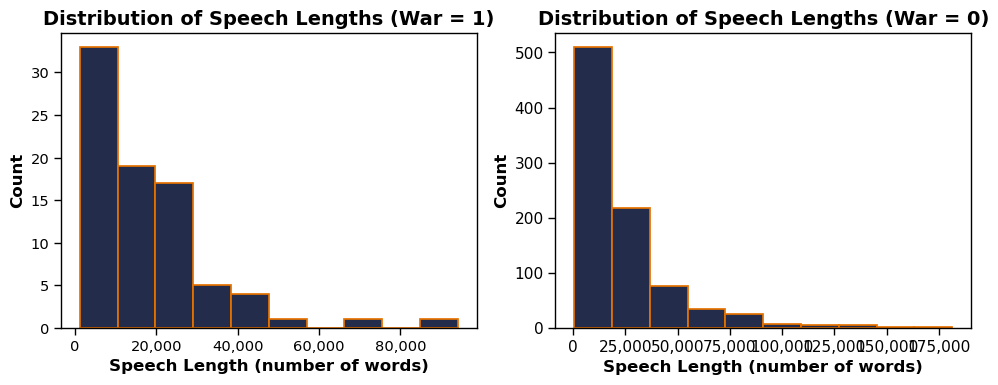

In [5]:
# Create subplots for side-by-side histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Function to plot histogram for a specific subset of data
def plot_histogram(ax, df, war_value):
    subset_lengths = df[df['War'] == war_value]['Transcript'].apply(lambda x: len(x))
    subset_lengths = subset_lengths.dropna()  # Drop NaN values
    ax.hist(subset_lengths, bins=10, color='#232D4B', edgecolor='#E57200', linewidth=1.25)
    ax.set_xlabel('Speech Length (number of words)', weight='bold', size=12)
    ax.set_ylabel('Count', weight='bold', size=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    ax.set_title(f'Distribution of Speech Lengths (War = {war_value})', weight='bold', size=14)
    # Format x-axis with thousands comma
    formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
    ax.xaxis.set_major_formatter(formatter)  # Apply formatter to current subplot's x-axis

# Plot histogram for "War" = 1
plot_histogram(axs[0], df, 1)

# Plot histogram for "War" = 0
plot_histogram(axs[1], df, 0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

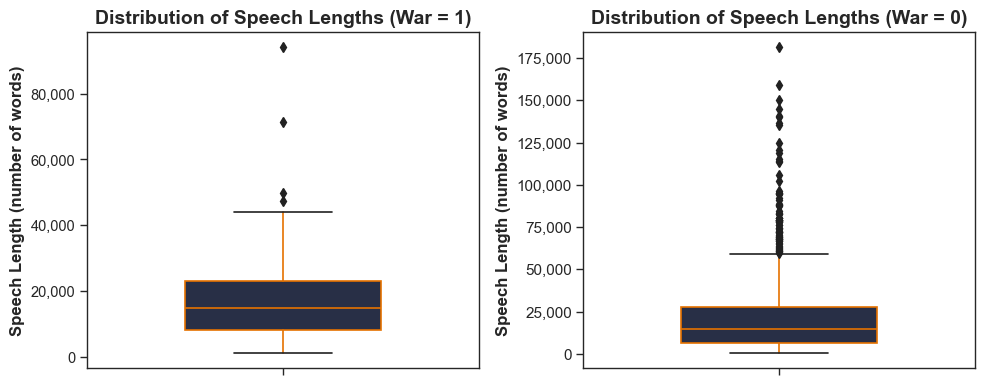

In [6]:
# Set Seaborn Style
sns.set_style("ticks")  # or "whitegrid"

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Function to plot boxplot for a specific subset of data
def plot_boxplot(ax, df, war_value):
    subset_lengths = df[df['War'] == war_value]['Transcript'].apply(len)
    sns.boxplot(y=subset_lengths, ax=ax, color='#232D4B', width=0.5, 
                boxprops=dict(edgecolor='#E57200'), 
                medianprops=dict(color='#E57200'),
                whiskerprops=dict(color='#E57200'))  # Set whisker line properties here
    ax.set_xlabel('')
    ax.set_ylabel('Speech Length (number of words)', weight='bold', size=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    ax.set_title(f'Distribution of Speech Lengths (War = {war_value})', weight='bold', size=14)
    # Format y-axis with thousands comma
    formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
    ax.yaxis.set_major_formatter(formatter)  # Apply formatter to current subplot's y-axis

# Plot boxplot for "War" = 1
plot_boxplot(axs[0], df, 1)

# Plot boxplot for "War" = 0
plot_boxplot(axs[1], df, 0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

In [7]:
grouped_stats = df.groupby('War')['Text Length'].describe(percentiles=[0.25, 0.5, 0.75])

# Extracting specific percentiles and renaming columns
grouped_stats = grouped_stats[['min', '25%', '50%', '75%', 'max']].rename(columns={'25%': '25th_percentile', '50%': 'median', '75%': '75th_percentile'})

print(grouped_stats)

        min  25th_percentile   median  75th_percentile       max
War                                                             
0     478.0          6683.75  15192.5         28322.75  186922.0
1    1252.0          8330.00  15291.0         23622.00   95779.0


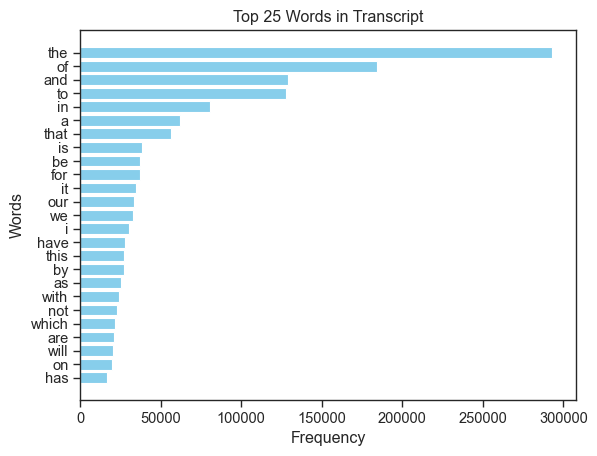

In [8]:
# Tokenize each transcript text and count word frequency
word_counts = Counter()
for transcript in df['Transcript']:
    if isinstance(transcript, str):  # Check if transcript is a string
        words = transcript.split()
        word_counts.update(words)

# Get the top 25 words
top_words = word_counts.most_common(25)

# Plot the top 25 words
words, counts = zip(*top_words)
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 25 Words in Transcript')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common word on top
plt.show()

# Based on the above chart, we may need to do some further cleaning (selecting words to remove, etc.)

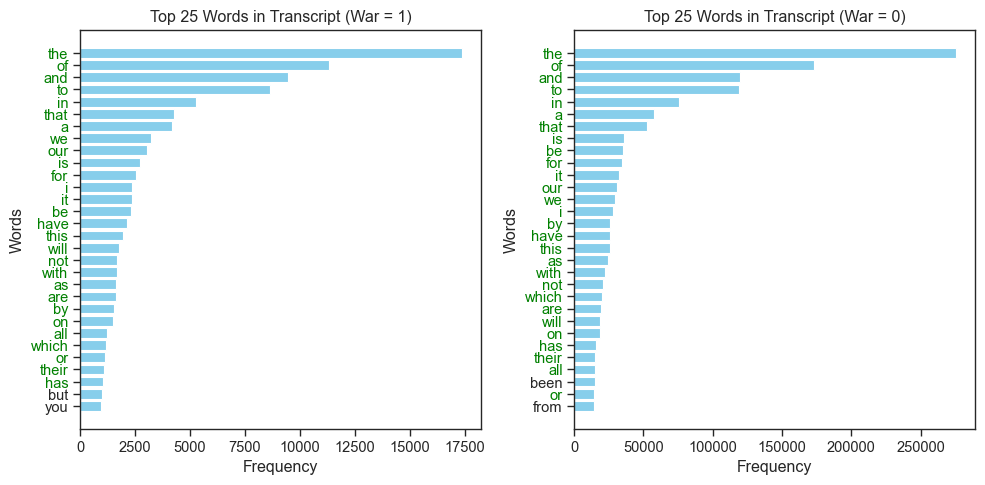

In [9]:
# Function to get top words and plot frequency
def plot_top_words(ax, df, war_value):
    # Filter DataFrame based on the value of "War" column
    subset_df = df[df['War'] == war_value]

    # Tokenize each transcript text and count word frequency
    word_counts = Counter()
    for transcript in subset_df['Transcript']:
        if isinstance(transcript, str):  # Check if transcript is a string
            words = transcript.split()
            word_counts.update(words)

    # Get the top 25 words
    top_words = word_counts.most_common(30)

    # Plot the top 25 words
    words, counts = zip(*top_words)
    ax.barh(range(len(words)), counts, color='skyblue')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_title(f'Top 25 Words in Transcript (War = {war_value})')
    ax.invert_yaxis()  # Invert y-axis to have the most common word on top
    #return top_words
    return set(words)  # Return the set of top words

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Get the top words for both subsets
top_words_war_1 = plot_top_words(axs[0], df, 1)
top_words_war_0 = plot_top_words(axs[1], df, 0)

# Find the intersection of top words
common_words = top_words_war_1.intersection(top_words_war_0)

# Mark the common words in both plots
for ax in axs:
    yticks = ax.get_yticklabels()
    for label in yticks:
        if label.get_text() in common_words:
            label.set_color('green')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

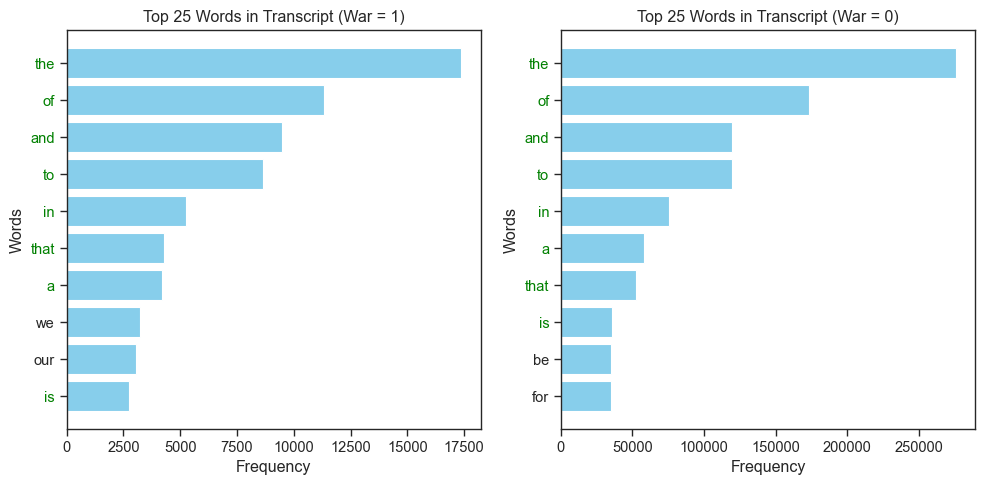

In [10]:
# Function to get top words and plot frequency
def plot_top_words(ax, df, war_value):
    # Filter DataFrame based on the value of "War" column
    subset_df = df[df['War'] == war_value]

    # Tokenize each transcript text and count word frequency
    word_counts = Counter()
    for transcript in subset_df['Transcript']:
        if isinstance(transcript, str):  # Check if transcript is a string
            words = transcript.split()
            word_counts.update(words)

    # Get the top 25 words
    top_words = word_counts.most_common(10)

    # Convert top words to DataFrame
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Save top words to CSV
    top_words_df.to_csv(f'top_words_war_{war_value}.csv', index=False)

    # Plot the top 25 words
    words, counts = zip(*top_words)
    ax.barh(range(len(words)), counts, color='skyblue')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_title(f'Top 25 Words in Transcript (War = {war_value})')
    ax.invert_yaxis()  # Invert y-axis to have the most common word on top
    return set(words)  # Return the set of top words

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Get the top words for both subsets
top_words_war_1 = plot_top_words(axs[0], df, 1)
top_words_war_0 = plot_top_words(axs[1], df, 0)

# Find the intersection of top words
common_words = top_words_war_1.intersection(top_words_war_0)

# Mark the common words in both plots
for ax in axs:
    yticks = ax.get_yticklabels()
    for label in yticks:
        if label.get_text() in common_words:
            label.set_color('green')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()